In [1]:
# setting the backend as interactive 
import ipympl 
%matplotlib notebook

# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# importing the data
df1 = pd.read_csv('Yellow Taxi Trips - Week 1.csv')
df2 = pd.read_csv('Yellow Taxi Trips - Week 2.csv')
df3 = pd.read_csv('Yellow Taxi Trips - Week 3.csv')
df4 = pd.read_csv('Yellow Taxi Trips - Week 4.csv')
df5 = pd.read_csv('Yellow Taxi Trips - Week 5.csv')

In [3]:
# concatenating the data frames
full_dataset = pd.concat([df1, df2, df3, df4, df5])

In [4]:
full_dataset.head()

,ID,Pickup_Date,Week_No,Passenger_Count,Trip_Distance,Tip_Amount,Total_Amount,Airport_Fee,Payment_Type,Rate_Code
0,418880,07/01/2022,1,1,17.45,0.0,79.05,0.0,Credit card,Newark
1,266865,05/01/2022,1,1,18.25,0.0,84.05,0.0,Cash,Newark
2,227117,04/01/2022,1,1,18.35,0.0,84.05,0.0,Credit card,Newark
3,193883,04/01/2022,1,1,17.70,0.0,78.05,0.0,Credit card,Newark
4,193349,04/01/2022,1,1,16.01,0.0,75.05,0.0,Cash,Newark


In [6]:
# getting the total number of trips for each payment type
trips = full_dataset.groupby(by = 'Payment_Type', as_index=False)['ID'].count()
trips

,Payment_Type,ID
0,Cash,492794
1,Credit card,1874544


In [13]:
trips.rename(columns = {'ID' : 'Trips'}, inplace = True)
trips

,Payment_Type,Trips
0,Cash,492794
1,Credit card,1874544


In [ ]:
plt.bar?

<IPython.core.display.Javascript object>


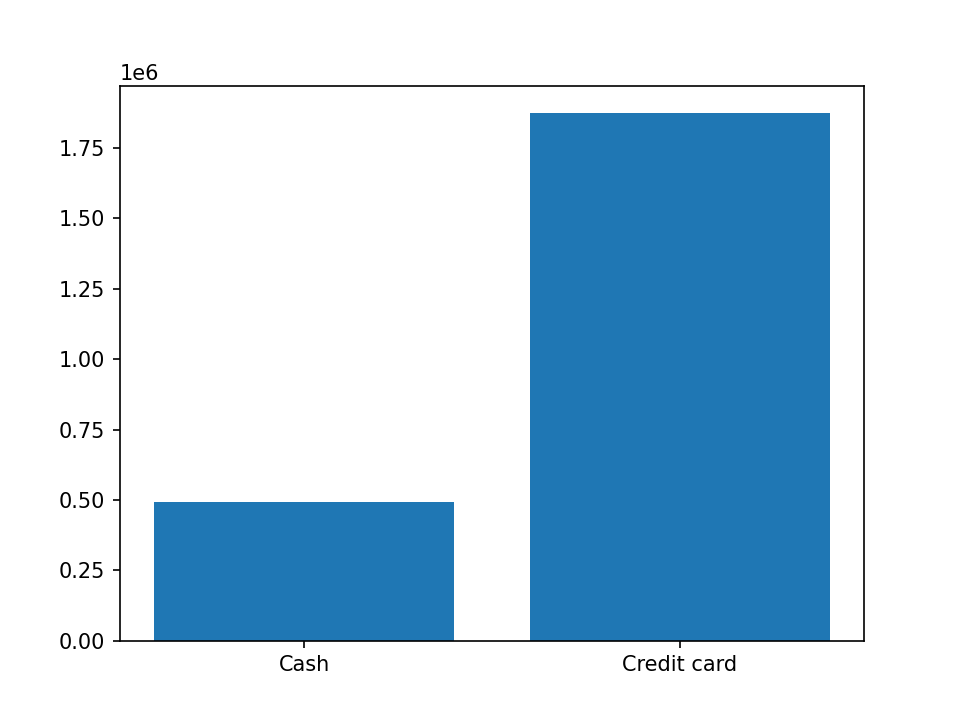

<BarContainer object of 2 artists>

In [11]:
# creating the chart
plt.bar(trips['Payment_Type'],trips['Trips'])

<IPython.core.display.Javascript object>


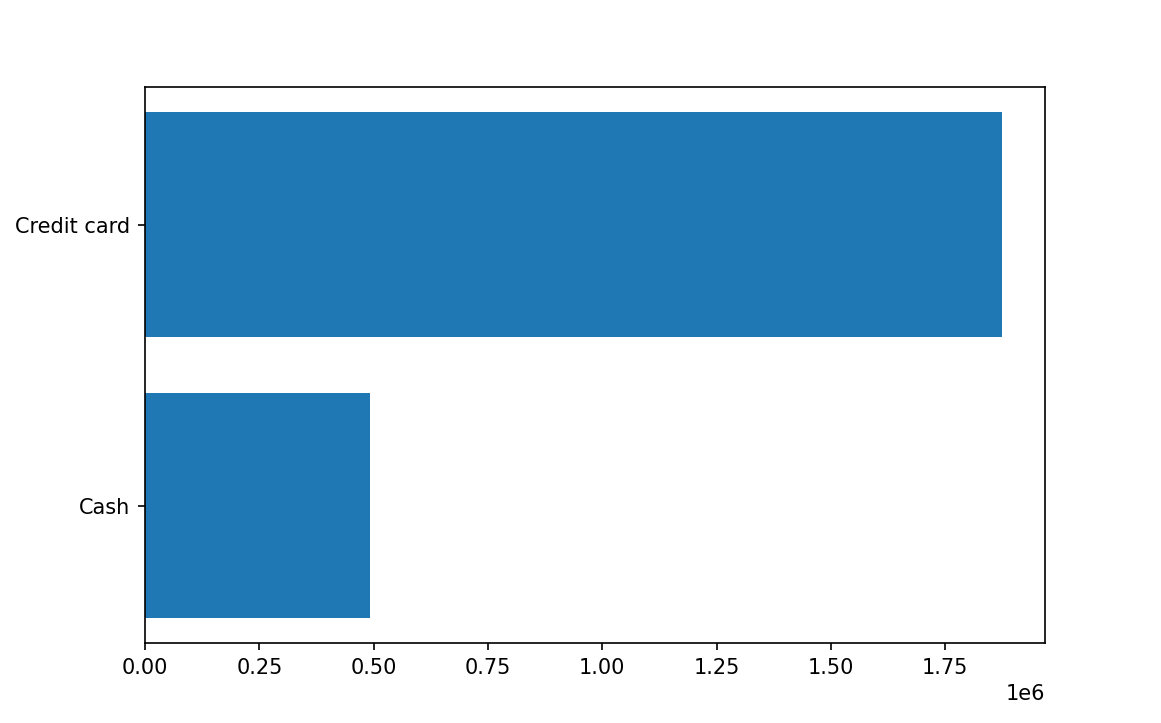

<BarContainer object of 2 artists>

In [12]:
# building a horizontal bar chart 
plt.barh(trips['Payment_Type'],trips['Trips'])

In [14]:
# creating a stacked bar chart 
# preparing the data
weekly_trips = full_dataset.pivot_table( values = 'ID',index = 'Week_No',columns = 'Payment_Type', aggfunc='count')
weekly_trips

Payment_Type,Cash,Credit card
Week_No,,
1,116387,361622
2,112151,426697
3,112264,453494
4,118142,489046
5,33850,143685


In [15]:
weekly_trips = weekly_trips.reset_index()
weekly_trips

Payment_Type,Week_No,Cash,Credit card
0,1,116387,361622
1,2,112151,426697
2,3,112264,453494
3,4,118142,489046
4,5,33850,143685


<IPython.core.display.Javascript object>


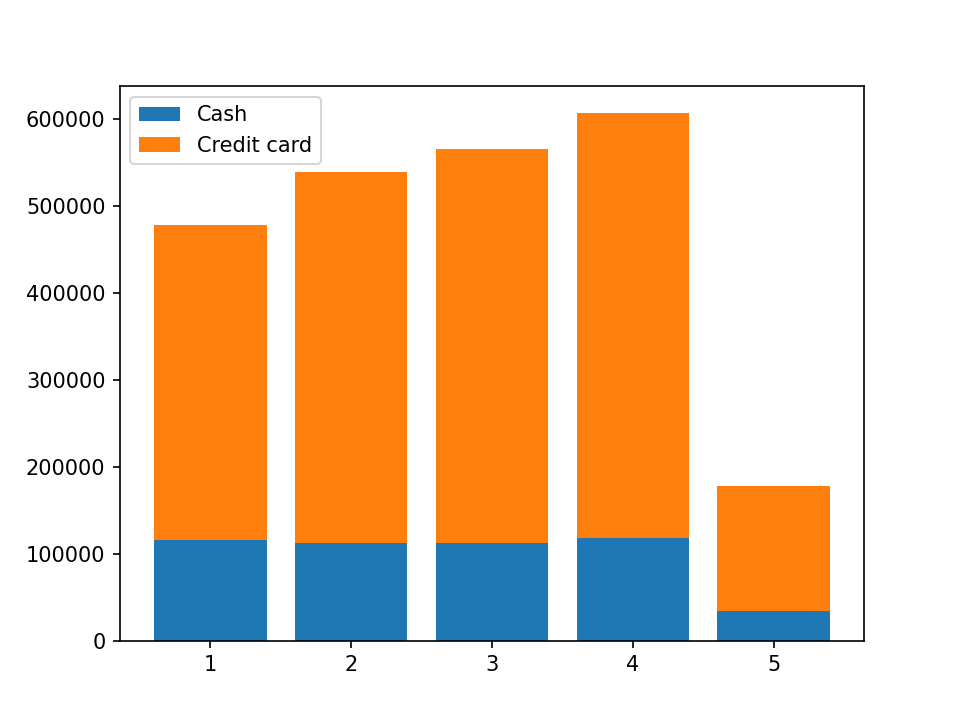

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

In [21]:
plt.bar(weekly_trips['Week_No'],weekly_trips['Cash'], label = 'Cash')
plt.bar(weekly_trips['Week_No'],weekly_trips['Credit card'], bottom = weekly_trips['Cash'], label = 'Credit card')
plt.legend()